Note this sample solution only contains analysis for Chemistry papers. Also, it is not in a report format that was expected for your submissions. Below is a list of typical section heading that were expected for the assignment:

+   Summary (or abstract)
+   Introduction
+   Method
+   Results
+   Conclusion
+   Discussion

# Prepare data

## Publication records dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
# read chem pubs
chempapers = pd.read_csv('chempubrecord.csv')
chempapers.head()

,Laureate ID,Laureate name,Prize year,Title,Pub year,Paper ID,DOI,Journal,Affiliation,Is prize-winning paper
0,20001,"stoddart, j",2016,a molecular shuttle,1991,1.976039e+09,10.1021/ja00013a096,journal of the american chemical society,northwestern university,YES
1,20001,"stoddart, j",2016,chemical synthesis of nanostructures,1993,1.963538e+09,10.1557/PROC-330-57,mrs proceedings,northwestern university,NO
2,20001,"stoddart, j",2016,formation and x ray crystal structure of pt h2...,1981,1.963552e+09,10.1039/C39810000851,journal of the chemical society chemical commu...,northwestern university,NO
3,20001,"stoddart, j",2016,single walled carbon nanotubes under the influ...,2005,2.095637e+09,10.1002/smll.200400070,small,northwestern university,NO
4,20001,"stoddart, j",2016,synthesis of medium heterocyclic rings from 6 ...,1974,2.095679e+09,10.1016/S0008-6215(00)82105-9,carbohydrate research,northwestern university,NO


Note the physics and med pubs data files may require setting encoding to _ISO-8859-1_ manually.

`pd.read_csv('medpubrec.csv', encoding='ISO-8859-1')`



## Citation counts

In [2]:
import time
import numpy as np
from habanero import counts

def count_citation(doi):
    """
    Retrieve citation counts using paper DOI.
    """
    if pd.isnull(doi):
        return np.nan
    else:
        time.sleep(0.005)
        print('Retrieving citation for DOI: {}'.format(doi))
        return counts.citation_count(doi=doi)
# chempapers['citecount'] = chempapers['DOI'].apply(
#     count_citation)
## retrieving cite counts each takes a long time.
## save it to a csv file to avoid performing the task repeatedly.
# chempapers.to_csv('chempapers.csv', index=False)
chempapers = pd.read_csv('chempapers.csv')

## Get team size

In [3]:
import json
from habanero import cn

def get_team_size(doi):
    """
    Retrieve team size of each paper from metadata.
    """
    if pd.isnull(doi):
        return np.nan
    try:
        time.sleep(0.005)
        meta = cn.content_negotiation(ids=doi, format='citeproc-json')
        print('Metadata for DOI: {} retrieved.'.format(doi))
        team = json.loads(meta)['author']
        return(len(team))
    except:
        print('Metadata for DOI: {} unavailable.'.format(doi))
        return np.nan
# chempapers['teamsize'] = chempapers['DOI'].apply(
#     get_team_size)
## retrieving team size for each takes a long time.
## save it to a csv file to avoid performing the task repeatedly.
# chempapers.to_csv('chempapers.csv', index=False)
chempapers = pd.read_csv('chempapers.csv')

## Get Laureate info

In [4]:
# create an array of last names
chempapers['last name'] = chempapers['Laureate name'].apply(
    lambda name: name.split(',')[0].split(' ')[-1]
)
last_names = chempapers['last name'].drop_duplicates()
# check they are unique
print("There are {} unique laureates.".format(
    len(chempapers['Laureate ID'].unique())
))
print("There are {} unique last names.".format(
    len(last_names)
))
print("There are {} Nobel prize winning papers.".format(
    chempapers[
        chempapers['Is prize-winning paper'] == 'YES'
    ].shape[0]
))
print("There are {} unique last name and Nobel prize year combinations.".format(
    len(chempapers[['last name', 'Prize year']].drop_duplicates())
))

There are 163 unique laureates.
There are 160 unique last names.
There are 259 Nobel prize winning papers.
There are 162 unique last name and Nobel prize year combinations.


In [5]:
# check duplicate IDs in the unique last name and prize year combination
chempapers[['Laureate ID','last name', 'Prize year']].groupby(
    ['last name', 'Prize year']
).filter(lambda x: x['Laureate ID'].nunique() > 1)

,Laureate ID,last name,Prize year
42226,20146,bosch,1931
42227,20146,bosch,1931
42228,20147,bosch,1931
42229,20147,bosch,1931


In [6]:
chempapers[chempapers['Prize year'] == 1931]

,Laureate ID,Laureate name,Prize year,Title,Pub year,Paper ID,DOI,Journal,Affiliation,Is prize-winning paper,citecount,teamsize,last name
42226,20146,carl bosch,1931,formation of anthracite,1913,NaN,NaN,NaN,NaN,YES,NaN,NaN,bosch
42227,20146,carl bosch,1931,die anwendung hoher drucke bei chemischen vorg...,1913,6.047096e+08,NaN,NaN,NaN,NO,NaN,NaN,bosch
42228,20147,carl bosch,1931,ABSORBING AMMONIA AND APPARATUS THEREFOR,1913,2.486733e+09,NaN,NaN,NaN,YES,NaN,NaN,bosch
42229,20147,carl bosch,1931,untersuchungen uber die wirkung von geigersche...,1930,2.089560e+09,10.1007/BF01492530,naturwissenschaften,NaN,NO,6.0,2.0,bosch


Checking the list of [Nobel Prizes in Chemistry](https://www.nobelprize.org/prizes/lists/all-nobel-prizes-in-chemistry), there were two Laureates in 1931. We won't fix this issue since three of the four papers missing DOI and are excluded from analysis in a later step. We will use the last name and prize year combination as the matching key for laureate details.

In [7]:
chempapers['laureate-key'] = chempapers.apply(
    lambda row: row['last name'] + "-" + str(row['Prize year']),
    axis=1
)
chempapers.head()

,Laureate ID,Laureate name,Prize year,Title,Pub year,Paper ID,DOI,Journal,Affiliation,Is prize-winning paper,citecount,teamsize,last name,laureate-key
0,20001,"stoddart, j",2016,a molecular shuttle,1991,1.976039e+09,10.1021/ja00013a096,journal of the american chemical society,northwestern university,YES,440.0,3.0,stoddart,stoddart-2016
1,20001,"stoddart, j",2016,chemical synthesis of nanostructures,1993,1.963538e+09,10.1557/PROC-330-57,mrs proceedings,northwestern university,NO,0.0,2.0,stoddart,stoddart-2016
2,20001,"stoddart, j",2016,formation and x ray crystal structure of pt h2...,1981,1.963552e+09,10.1039/C39810000851,journal of the chemical society chemical commu...,northwestern university,NO,7.0,3.0,stoddart,stoddart-2016
3,20001,"stoddart, j",2016,single walled carbon nanotubes under the influ...,2005,2.095637e+09,10.1002/smll.200400070,small,northwestern university,NO,73.0,4.0,stoddart,stoddart-2016
4,20001,"stoddart, j",2016,synthesis of medium heterocyclic rings from 6 ...,1974,2.095679e+09,10.1016/S0008-6215(00)82105-9,carbohydrate research,northwestern university,NO,6.0,4.0,stoddart,stoddart-2016


In [8]:
# retrieve all laureates
api_url = 'http://api.nobelprize.org/2.0/laureates?limit=1000&format=csv'
laureates = pd.read_csv(api_url)

In [9]:
# creat a column with lower case last names to match the main data
laureates['last name'] = laureates['name'].apply(
    lambda name: name.lower().split(' ')[-1]
)
laureates['laureate-key'] = laureates.apply(
    lambda row: row['last name'] + "-" + str(row['year']),
    axis=1
)
laureates.head()

,id,name,gender,birthdate,birthplace,deathdate,deathplace,category,year,share,overallmotivation,motivation,affiliations,last name,laureate-key
0,745,A. Michael Spence,male,1943-00-00,Montclair NJ USA,NaN,NaN,Economic Sciences,2001,1/3,NaN,for their analyses of markets with asymmetric ...,Stanford University; Stanford CA USA,spence,spence-2001
1,102,Aage N. Bohr,male,1922-06-19,Copenhagen Denmark,2009-09-08,Copenhagen Denmark,Physics,1975,1/3,NaN,for the discovery of the connection between co...,Niels Bohr Institute; Copenhagen Denmark,bohr,bohr-1975
2,779,Aaron Ciechanover,male,1947-10-01,Haifa British Protectorate of Palestine (now I...,NaN,NaN,Chemistry,2004,1/3,NaN,for the discovery of ubiquitin-mediated protei...,Technion - Israel Institute of Technology; Hai...,ciechanover,ciechanover-2004
3,259,Aaron Klug,male,1926-08-11,Zelvas Lithuania,2018-11-20,NaN,Chemistry,1982,1,NaN,for his development of crystallographic electr...,MRC Laboratory of Molecular Biology; Cambridge...,klug,klug-1982
4,114,Abdus Salam,male,1926-01-29,Jhang Maghiāna India (now Pakistan),1996-11-21,Oxford United Kingdom,Physics,1979,1/3,NaN,for their contributions to the theory of the u...,International Centre for Theoretical Physics; ...,salam,salam-1979


In [10]:
print("There are {} unique last names among Laureates in Chemistry.".format(
    len(laureates[laureates['category'] == 'Chemistry']['laureate-key'].unique())
))

There are 184 unique last names among Laureates in Chemistry.


184 matches the number of laureates listed on the website as well.

In [11]:
# join the two table 
chem_merge = pd.merge(
    chempapers, laureates, 
    on='laureate-key', how='left'
)
chem_merge.to_csv('chem_merge.csv', index=False)
print(chem_merge.shape)
chem_merge.head()

(42657, 28)


,Laureate ID,Laureate name,Prize year,Title,Pub year,Paper ID,DOI,Journal,Affiliation,Is prize-winning paper,...,birthplace,deathdate,deathplace,category,year,share,overallmotivation,motivation,affiliations,last name_y
0,20001,"stoddart, j",2016,a molecular shuttle,1991,1.976039e+09,10.1021/ja00013a096,journal of the american chemical society,northwestern university,YES,...,Edinburgh United Kingdom,NaN,NaN,Chemistry,2016.0,1/3,NaN,for the design and synthesis of molecular mach...,Northwestern University; Evanston IL USA,stoddart
1,20001,"stoddart, j",2016,chemical synthesis of nanostructures,1993,1.963538e+09,10.1557/PROC-330-57,mrs proceedings,northwestern university,NO,...,Edinburgh United Kingdom,NaN,NaN,Chemistry,2016.0,1/3,NaN,for the design and synthesis of molecular mach...,Northwestern University; Evanston IL USA,stoddart
2,20001,"stoddart, j",2016,formation and x ray crystal structure of pt h2...,1981,1.963552e+09,10.1039/C39810000851,journal of the chemical society chemical commu...,northwestern university,NO,...,Edinburgh United Kingdom,NaN,NaN,Chemistry,2016.0,1/3,NaN,for the design and synthesis of molecular mach...,Northwestern University; Evanston IL USA,stoddart
3,20001,"stoddart, j",2016,single walled carbon nanotubes under the influ...,2005,2.095637e+09,10.1002/smll.200400070,small,northwestern university,NO,...,Edinburgh United Kingdom,NaN,NaN,Chemistry,2016.0,1/3,NaN,for the design and synthesis of molecular mach...,Northwestern University; Evanston IL USA,stoddart
4,20001,"stoddart, j",2016,synthesis of medium heterocyclic rings from 6 ...,1974,2.095679e+09,10.1016/S0008-6215(00)82105-9,carbohydrate research,northwestern university,NO,...,Edinburgh United Kingdom,NaN,NaN,Chemistry,2016.0,1/3,NaN,for the design and synthesis of molecular mach...,Northwestern University; Evanston IL USA,stoddart


## Define timing measure

We will use the percentile rank of each paper for each author.

In [12]:
chem_merge['timing'] = chem_merge.groupby(
        'Laureate name')['Pub year'].rank(
        pct = True)

# Method

We first conduct exploratory analysis of the relevant variables including the main variables of interest - citation counts and timing as well as other covariates that may provide relevant information:

Author attributes:
+   age at the time of publication
+   gender

Paper attributes:
+   teamsize
+   publication year
+   whether the paper is the winning paper

## Missing values

In [13]:
chem_merge[
    ['DOI', 'citecount', 'timing', 'teamsize', 'gender']
].isnull().sum()

DOI            27
citecount      27
timing          0
teamsize      336
gender       2416
dtype: int64

Any data without DOI are removed as the cite counts are missing.

In [14]:
chem_df = (
    chem_merge.dropna(subset=['DOI'])
    .copy()
    .reset_index()
    .drop(columns='index')
)
chem_df.shape

(42630, 29)

## Inspect cite count and timing

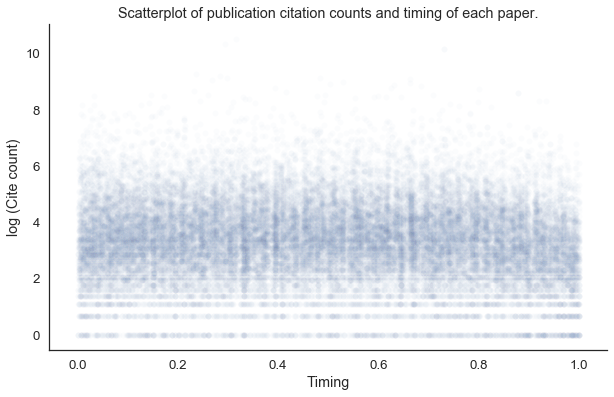

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)
sns.set_style('white')
# inspect relationship with timing
plt.figure(figsize=(10,6))
fig = sns.scatterplot(
    x=chem_df['timing'],
    y=np.log(chem_df['citecount']), 
    alpha=0.02
).set_title(
    'Scatterplot of publication citation counts and timing of each paper.'
)
plt.xlabel('Timing')
plt.ylabel('log (Cite count)')
sns.despine();

## Age

In [16]:
# define age as pub year - birth year
# note this may introduce rounding error
birth_year = (
    chem_df['birthdate']
    .str[:4]
)
birth_year = pd.Series([
    np.nan if pd.isnull(x) else int(x) 
    for x in birth_year
])

chem_df['age'] = (
    chem_df['Pub year']
    - pd.Series(birth_year)
)

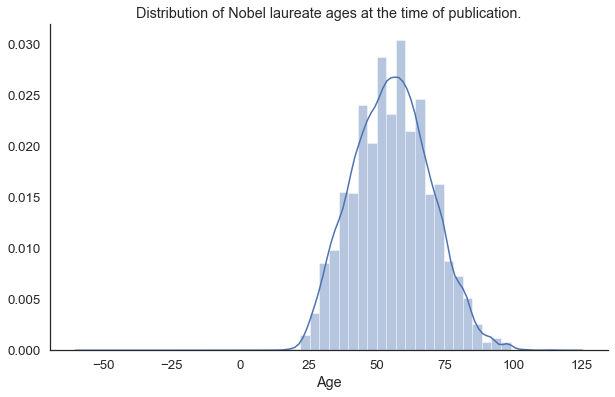

In [17]:
plt.figure(figsize=(10,6))
# inspect distribution
sns.distplot(
    chem_df['age'].dropna(),
    axlabel='Age',
    
).set_title(
    'Distribution of Nobel laureate ages at the time of publication.'
)
sns.despine();

In [18]:
chem_df[chem_df['age'] < 15][['age', 'Pub year', 'birthdate', 'Laureate name']]

,age,Pub year,birthdate,Laureate name
16992,-55.0,1886,1941-01-07,"walker, j"
17735,7.0,1950,1943-06-06,"smalley, r"
28759,9.0,1927,1918-10-04,"fukui, k"
28851,12.0,1930,1918-10-04,"fukui, k"
28875,5.0,1923,1918-10-04,"fukui, k"
42209,13.0,1894,1881-07-27,"fischer, h"


In [19]:
# the paper with negative age is removed
chem_df = chem_df.drop(index=16992).reset_index().drop(columns='index')
age_df = chem_df.dropna(subset=['age'])

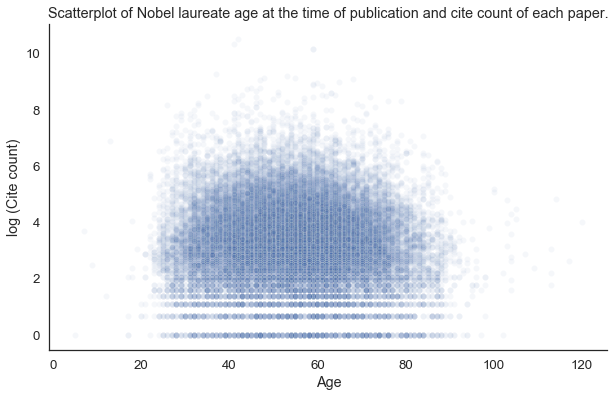

In [20]:
# inspect relationship with citation counts
plt.figure(figsize=(10,6))
fig = sns.scatterplot(
    x=age_df['age'], y=np.log(age_df['citecount']),
    alpha=0.05
).set_title(
    'Scatterplot of Nobel laureate age at the time of publication and cite count of each paper.'
)
plt.xlabel('Age')
plt.ylabel('log (Cite count)')
sns.despine();

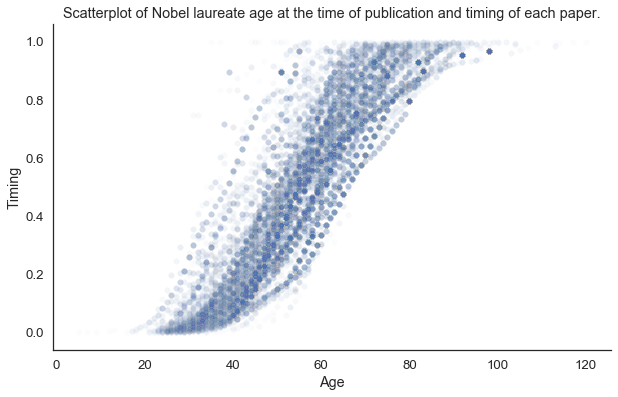

In [21]:
# inspect relationship with timing
plt.figure(figsize=(10,6))
fig = sns.scatterplot(
    x='age', y='timing',
    data=age_df,
    alpha=0.02
).set_title(
    'Scatterplot of Nobel laureate age at the time of publication and timing of each paper.'
)
plt.xlabel('Age')
plt.ylabel('Timing')
sns.despine();

In [22]:
from scipy import stats
stats.pearsonr(age_df['age'], age_df['timing'])

(0.8755836313574925, 0.0)

While it isn't peferctly linear, age shows a strong correlation with timing. Since they both contain the same ranking information for each author, age isn't considered in the regression model.

## Team size

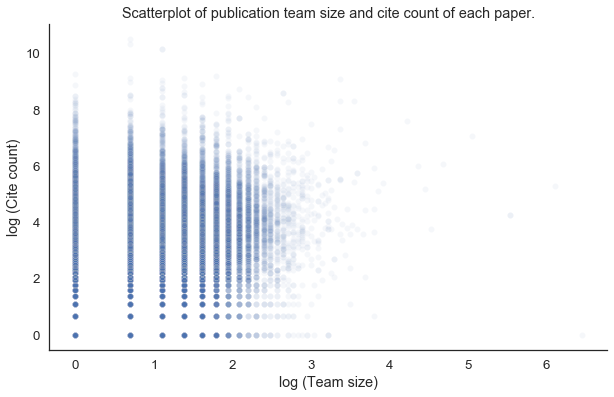

In [23]:
# inspect relationship with citation counts
plt.figure(figsize=(10,6))
fig = sns.scatterplot(
    x=np.log(chem_df['teamsize']), 
    y=np.log(chem_df['citecount']),
    alpha=0.05
).set_title(
    'Scatterplot of publication team size and cite count of each paper.'
)
plt.xlabel('log (Team size)')
plt.ylabel('log (Cite count)')
sns.despine();

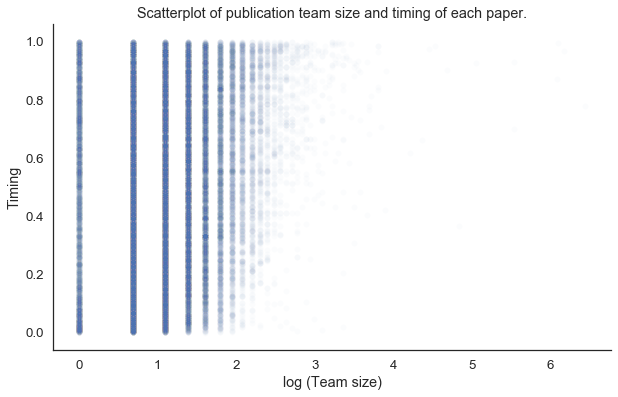

In [24]:
# inspect relationship with timing
plt.figure(figsize=(10,6))
fig = sns.scatterplot(
    x=np.log(chem_df['teamsize']), y=chem_df['timing'],
    alpha=0.02
).set_title(
    'Scatterplot of publication team size and timing of each paper.'
)
plt.xlabel('log (Team size)')
plt.ylabel('Timing')
sns.despine();

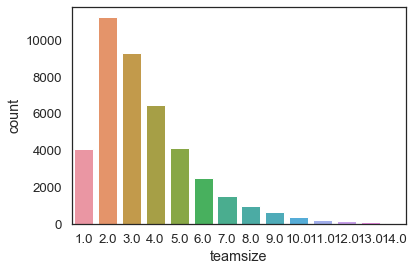

In [25]:
# inspect to decide cut
sns.countplot(chem_df['teamsize'][chem_df['teamsize'] < 15]);

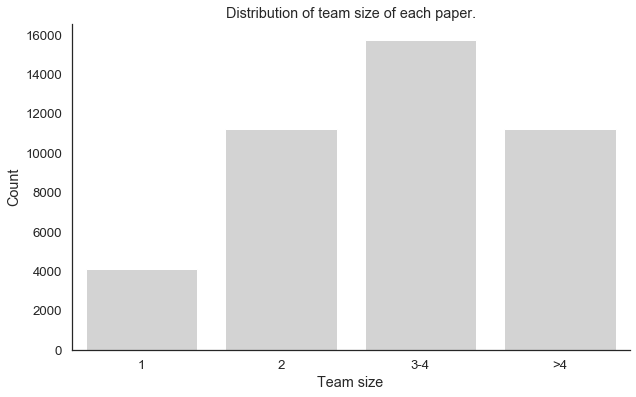

In [26]:
chem_df['teamsize_cat'] = (
    pd.cut(chem_df['teamsize'], [0,1,2,4,1000])
    .cat.rename_categories(['1','2','3-4','>4'])
)
teamsize_df = chem_df.dropna(subset=['teamsize', 'citecount'])
# inspect distribution
plt.figure(figsize=(10,6))
sns.countplot(
    chem_df['teamsize_cat'],
    color='lightgray'
).set_title(
    'Distribution of team size of each paper.'
)
plt.xlabel('Team size')
plt.ylabel('Count')
sns.despine();

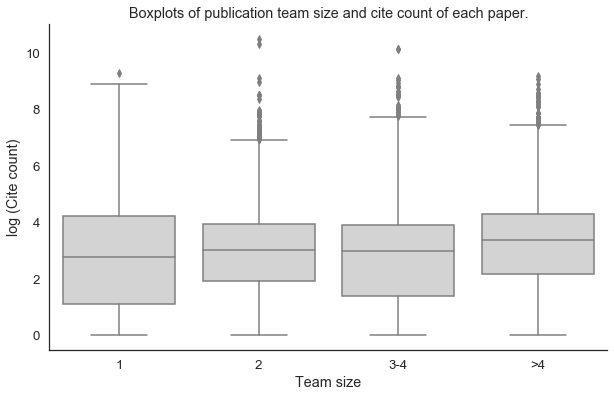

In [27]:
# inspect relationship with citation counts
plt.figure(figsize=(10,6))
sns.boxplot(
    x=teamsize_df['teamsize_cat'], 
    y=np.log(teamsize_df['citecount']),
    color='lightgrey'
).set_title(
    'Boxplots of publication team size and cite count of each paper.'
)
plt.xlabel('Team size')
plt.ylabel('log (Cite count)')
sns.despine();

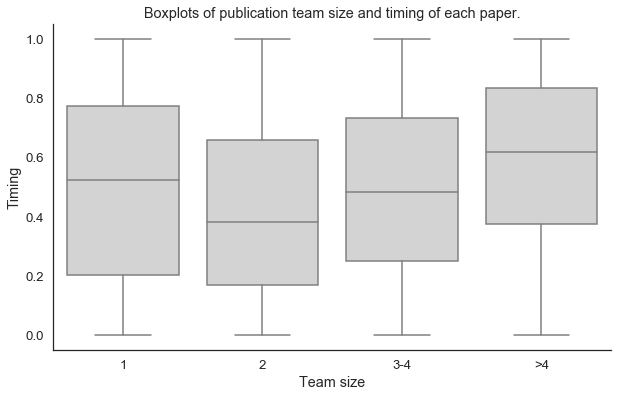

In [28]:
# inspect relationship with timing
plt.figure(figsize=(10,6))
sns.boxplot(
    x=teamsize_df['teamsize_cat'], 
    y=teamsize_df['timing'],
    color='lightgrey'
).set_title(
    'Boxplots of publication team size and timing of each paper.'
)
plt.xlabel('Team size')
plt.ylabel('Timing')
sns.despine();

While the relationships aren't obvious, the log-log plots suggest team size may be a confounding factor. The binned variable is included in the regression for interpretatability. $log(Teamsize)$ is difficult to interpret.

## Publication year

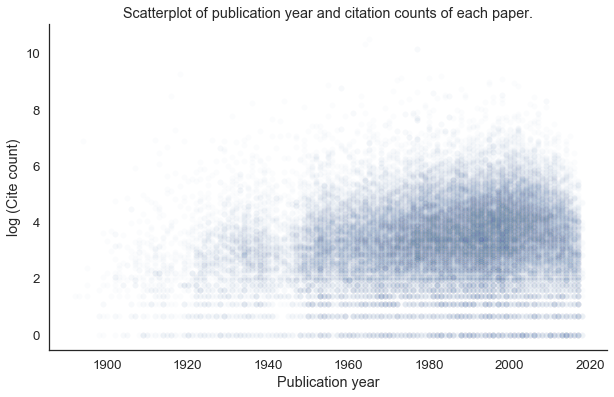

In [29]:
# inspect relationship with citation counts
plt.figure(figsize=(10,6))
fig = sns.scatterplot(
    x=chem_df['Pub year'], y=np.log(chem_df['citecount']),
    alpha=0.02
).set_title(
    'Scatterplot of publication year and citation counts of each paper.'
)
plt.xlabel('Publication year')
plt.ylabel('log (Cite count)')
sns.despine();

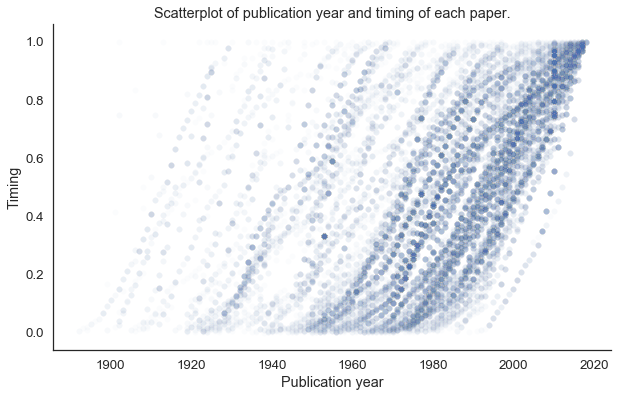

In [30]:
# inspect relationship with timing
plt.figure(figsize=(10,6))
fig = sns.scatterplot(
    x='Pub year', y='timing',
    data=chem_df,
    alpha=0.02
).set_title(
    'Scatterplot of publication year and timing of each paper.'
)
plt.xlabel('Publication year')
plt.ylabel('Timing')
sns.despine();

The relationship shows a upward trend. However, we observe a decresing trend from 2000. This may be due to the fact that these papers are relatively 'young'. 

The publication year vs. timing plot suggests a pattern of a higher number of publications by authors who started their academic career between 1945 and 1980. I will roughly create 3 periods based on this observation.

+   Period 1: (1890, 1945] (upto WW2)
+   Period 2: (1945, 1980] (post WW2)
+   Period 3: (1980, 2020] (present)

(Also, roughly similar to Larsen and von Ins, 2010 categorization\footnote{\url{https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2909426/}}, student submission credit: Haoda Li)

In [31]:
chem_df['pub_period'] = (
    pd.cut(chem_df['Pub year'], [1890,1945,1980,2020])
    .cat.rename_categories(['prd1','prd2','prd3'])
)

## Prize winning papers

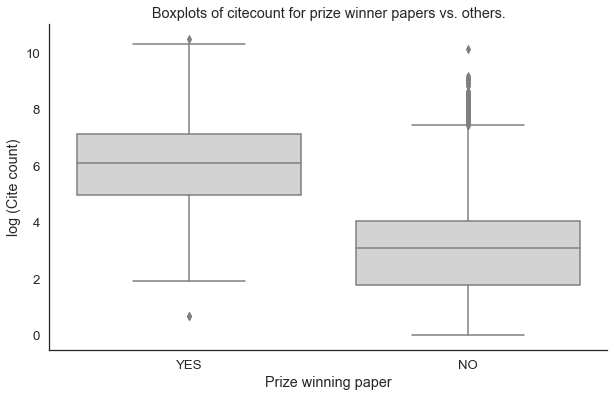

In [32]:
# inspect award winning papers vs. others
# inspect relationship with timing
plt.figure(figsize=(10,6))
sns.boxplot(
    x=chem_df['Is prize-winning paper'], 
    y=np.log(teamsize_df['citecount']),
    color='lightgrey'
).set_title(
    'Boxplots of citecount for prize winner papers vs. others.'
)
plt.xlabel('Prize winning paper')
plt.ylabel('log (Cite count)')
sns.despine();

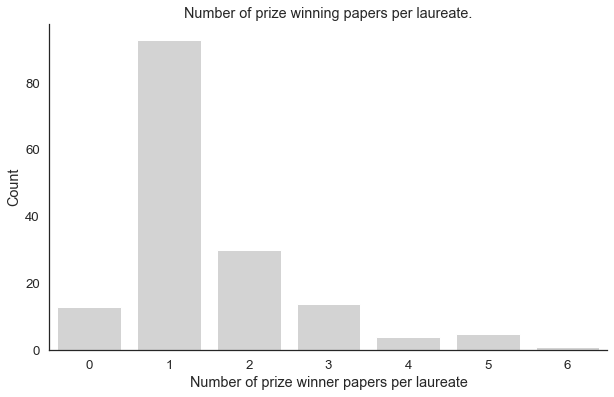

In [33]:
# count number of prize winning papers by each laureate
prize_paper_counts = chem_df.groupby('Laureate name').apply(
    lambda x: np.sum(x['Is prize-winning paper'] == 'YES')
).sort_values()
plt.figure(figsize=(10,6))
sns.countplot(
    prize_paper_counts,
    color='lightgrey'
).set_title(
    'Number of prize winning papers per laureate.'
)
plt.xlabel('Number of prize winner papers per laureate')
plt.ylabel('Count')
sns.despine();

We notice the citation count distributions are significantly different between prize winning papers and the rest. There are laureates whose prize winning papers are not included in the data set. Also, there are laureates who won prize based on multiple papers according to the data set. For the analysis, the prize winner papers are dropped as they drive the esitimates for the rest significantly. Including the indicator in the model fails computationally as there are laureates without a winner paper in the data.

In [34]:
df_wo_win = chem_df[chem_df['Is prize-winning paper'] != 'YES']

In [35]:
# prep for R
df = df_wo_win[[
    'citecount', 'timing',
    'Laureate name',
#     'gender' ### excluded due to extreme imbalance
    'teamsize_cat', 'pub_period', 
    'Pub year' # included for plotting
]]
# rename columns to remove spaces 
# to make it easier to work with the columns
df.rename(
    columns={
        'Laureate name': 'laureate',
        'Pub year': 'pub_year'
    },
    inplace=True
)

In [36]:
print(len(df))
# check missing values
df.isnull().sum(axis=0)

42387


citecount         0
timing            0
laureate          0
teamsize_cat    303
pub_period        0
pub_year          0
dtype: int64

Only team size contains missing values (309 out of 42,629 papers).
These records will be dropped before fitting the regression model.

In [37]:
df.dropna(inplace=True)

# Model

$$Y_{i,j} \vert U_i \sim \text{Poisson}\left(\lambda_{i,j}\right)$$
$$\log\left(\lambda_{i,j}\right)=X_{i,j}\beta$$
$$U_i\sim\mathcal{N}\left(0,\sigma^2\right)$$

where $U_i$ represents the random effect intercept for author $i$;
$X_{i,j}$ are the covariates for author $i$'s paper $j$ including 
timing in the author's career, publiation year, and whether the paper
was written after the author won the Nobel prize; and finally, $Y_{i,j}$
represent the citation count for author $i$'s paper $j$.

A random effect model is used since we expect the citation counts for papers from a single author aren't independent.

In [38]:
%load_ext rpy2.ipython

In [39]:
%%R
library(lme4)

R[write to console]: Loading required package: Matrix



In [40]:
%R -i df

In [41]:
%%R
# fit the Poisson GLMM (generalized linear mixed model) 
mdl.full <- glmer(
    citecount ~ timing + factor(pub_period) 
        + factor(teamsize_cat) + (1|laureate),
    data=df, family='poisson',
    optimizer='bobyqa'
)
# a simple model for reference
mdl.ref <- glmer(
    citecount ~ timing + (1|laureate),
    data=df, family='poisson'
)

In [42]:
%%R
summary(mdl.full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: citecount ~ timing + factor(pub_period) + factor(teamsize_cat) +  
    (1 | laureate)
   Data: df

     AIC      BIC   logLik deviance df.resid 
 5773836  5773905 -2886910  5773820    42076 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
 -30.28   -6.08   -3.52    0.64 1320.75 

Random effects:
 Groups   Name        Variance Std.Dev.
 laureate (Intercept) 0.8688   0.9321  
Number of obs: 42084, groups:  laureate, 154

Fixed effects:
                        Estimate Std. Error  z value Pr(>|z|)    
(Intercept)             4.054242   0.073746   54.976   <2e-16 ***
timing                 -0.425948   0.002839 -150.055   <2e-16 ***
factor(pub_period).L    0.142455   0.003896   36.561   <2e-16 ***
factor(pub_period).Q    0.071397   0.002042   34.958   <2e-16 ***
factor(teamsize_cat).L -0.181480   0.001558 -116.473   <2e-16 ***
factor(teamsize_cat).Q  

In [43]:
%%R
summary(mdl.ref)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: citecount ~ timing + (1 | laureate)
   Data: df

     AIC      BIC   logLik deviance df.resid 
 5815425  5815451 -2907710  5815419    42081 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
 -26.00   -6.14   -3.59    0.54 1336.84 

Random effects:
 Groups   Name        Variance Std.Dev.
 laureate (Intercept) 0.937    0.968   
Number of obs: 42084, groups:  laureate, 154

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.961400   0.074235   53.36   <2e-16 ***
timing      -0.253283   0.002101 -120.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr)
timing -0.013


In [44]:
%%R
# extract estimated coefficients
fe_full <- as.data.frame(summary(mdl.full)$coefficients)
fe_ref <- as.data.frame(summary(mdl.ref)$coefficients)
re_full <- as.data.frame(coef(mdl.full)$laureate)
re_ref <- as.data.frame(coef(mdl.ref)$laureate)

In [45]:
# export to Python from R
%R -o fe_full
%R -o fe_ref 
%R -o re_full
%R -o re_ref

In order to evaluate the goodness of fit, we will plot the fitte values vs. observed using the laureate with most published papers as well as someone wih a median random effect estimate (a "typical" author).

In [46]:
# check the author with the most publiscations
num_papers = (
    df[['laureate', 'citecount']]
    .groupby('laureate')
    .count()
    .sort_values('citecount', ascending=False)
)
num_papers.head(5)

,citecount
laureate,
"olah, g",1850
"brown, h",1628
"corey, e",1392
"barton, d",1276
"stoddart, j",1201


In [47]:
# check the author with the median random effect
est_med_full = re_full.iloc[int(len(re_full)/2) + 1] 
est_med_full.name

'macdiarmid, a'

In [48]:
est_med_ref = re_ref.loc['marcus, r']
est_med_full = re_full.loc['marcus, r']
est_most_ref = re_ref.loc['olah, g']
est_most_full = re_full.loc['olah, g']

In [49]:
# check counts by categorical variables
pd.crosstab(
    df[df['laureate'] == 'olah, g']['pub_period'],
    df[df['laureate'] == 'olah, g']['teamsize_cat'])

teamsize_cat,1,2,3-4,>4
pub_period,,,,
prd2,18,319,448,48
prd3,26,82,574,335


In [50]:
# check counts by categorical variables
pd.crosstab(
    df[df['laureate'] == 'marcus, r']['pub_period'],
    df[df['laureate'] == 'marcus, r']['teamsize_cat'])

teamsize_cat,1,2,3-4,>4
pub_period,,,,
prd2,59,45,20,0
prd3,57,104,51,10


In [51]:
df['log_citecount'] = np.log(df['citecount'])

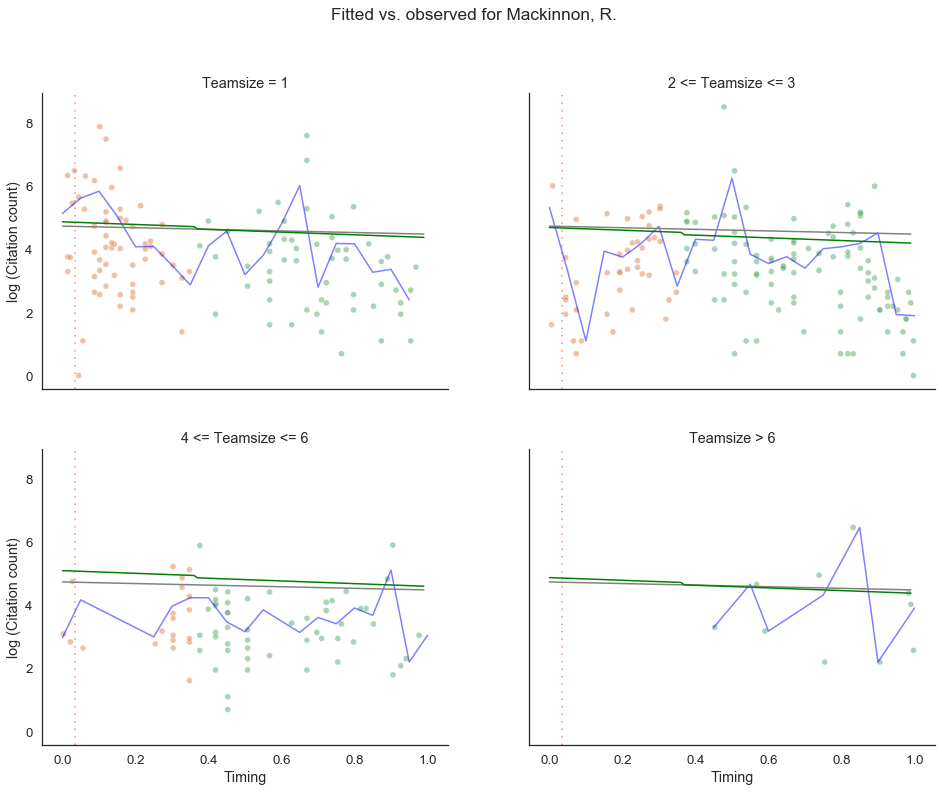

In [52]:
# inspect the observed vs. fitted
df_sel = df[df['laureate'] == 'marcus, r']
# for plotting means every 0.05 timing
df_sel['timing_round'] = np.around(df_sel['timing']/5,2)*5
obs_means = df_sel.groupby(
    ['teamsize_cat', 'timing_round']
)['citecount'].mean().dropna().reset_index()
obs_means = obs_means[obs_means['citecount'] > 0]
obs_means['log_citecount'] = np.log(obs_means['citecount'])
# construct covariate matrix for fitted values
x = np.arange(0,1,0.01)
# get timing as median of two papers around 1980
period_timing = np.median(
    [df_sel[df_sel['pub_year'] <= 1980]['timing'].max(),
    df_sel[df_sel['pub_year'] > 1980]['timing'].min()]
)
prize_timing = chem_df[
    (chem_df['Laureate name'] == 'marcus, r')
    & (chem_df['Is prize-winning paper'] == 'YES')
]['timing'].values[0]
X = pd.DataFrame({
    'intercept': np.ones(len(x)),
    'timing': x,
    'period2': [1 if t <= period_timing else 0 for t in x],
    'period3': [1 if t > period_timing else 0 for t in x]
})
# plot
fig, ax = plt.subplots(
    2, 2, 
    sharex='all', sharey='all', 
    figsize=(16,12));
# mark prize winning year
ax[0,0].axvline(x=prize_timing, color='red', dashes=[1,4], alpha=0.5)
ax[0,1].axvline(x=prize_timing, color='red', dashes=[1,4], alpha=0.5)
ax[1,0].axvline(x=prize_timing, color='red', dashes=[1,4], alpha=0.5)
ax[1,1].axvline(x=prize_timing, color='red', dashes=[1,4], alpha=0.5)
# plot observed
sns.scatterplot(
    x='timing',
    y='log_citecount',
    hue='pub_period', legend=False,
    data=df_sel[df_sel['teamsize_cat'] == '1'],
    alpha=0.5,
    ax=ax[0,0]
).set_title(
    'Teamsize = 1'
)
sns.scatterplot(
    x='timing',
    y='log_citecount',
    hue='pub_period', legend=False,
    data=df_sel[df_sel['teamsize_cat'] == '2'],
    alpha=0.5,
    ax=ax[0,1]
).set_title(
    '2 <= Teamsize <= 3'
)
sns.scatterplot(
    x='timing',
    y='log_citecount',
    hue='pub_period', legend=False,
    data=df_sel[df_sel['teamsize_cat'] == '3-4'],
    alpha=0.5,
    ax=ax[1,0]
).set_title(
    '4 <= Teamsize <= 6'
)
sns.scatterplot(
    x='timing',
    y='log_citecount',
    hue='pub_period', legend=False,
    data=df_sel[df_sel['teamsize_cat'] == '>4'],
    alpha=0.5,
    ax=ax[1,1]
).set_title(
    'Teamsize > 6'
)
# plot observed means
sns.lineplot(
    x='timing_round',
    y='log_citecount',
    data=obs_means[obs_means['teamsize_cat']=='1'],
    color='blue',
    alpha=0.5,
    ax=ax[0,0]
)
sns.lineplot(
    x='timing_round',
    y='log_citecount',
    data=obs_means[obs_means['teamsize_cat']=='2'],
    color='blue',
    alpha=0.5,
    ax=ax[0,1]
)
sns.lineplot(
    x='timing_round',
    y='log_citecount',
    data=obs_means[obs_means['teamsize_cat']=='3-4'],
    color='blue',
    alpha=0.5,
    ax=ax[1,0]
)
sns.lineplot(
    x='timing_round',
    y='log_citecount',
    data=obs_means[obs_means['teamsize_cat']=='>4'],
    color='blue',
    alpha=0.5,
    ax=ax[1,1]
)
# plot fitted reference
sns.lineplot(
    x,
    np.array(X.iloc[:, :2])@est_med_ref,
    color='gray',
    ax=ax[0,0]
)
sns.lineplot(
    x,
    np.array(X.iloc[:, :2])@est_med_ref,
    color='gray',
    ax=ax[0,1]
)
sns.lineplot(
    x,
    np.array(X.iloc[:, :2])@est_med_ref,
    color='gray',
    ax=ax[1,0]
)
sns.lineplot(
    x,
    np.array(X.iloc[:, :2])@est_med_ref,
    color='gray',
    ax=ax[1,1]
)
# plot fitted full
Y = np.concatenate(
    (np.array(X), np.zeros([len(x), 3])),
    axis=1)
sns.lineplot(
    x,
    Y@est_med_full,
    color='green',
    ax=ax[0,0]
)
Y[:, 4] = 1
sns.lineplot(
    x,
    Y@est_med_full,
    color='green',
    ax=ax[0,1]
)
Y[:, 4] = 0
Y[:, 5] = 1
sns.lineplot(
    x,
    Y@est_med_full,
    color='green',
    ax=ax[1,0]
)
Y[:, 5] = 0
Y[:, 6] = 1
sns.lineplot(
    x,
    Y@est_med_full,
    color='green',
    ax=ax[1,1]
)
fig.suptitle('Fitted vs. observed for Mackinnon, R.')
ax[0,0].set_xlabel('Timing')
ax[0,1].set_xlabel('Timing')
ax[1,0].set_xlabel('Timing')
ax[1,1].set_xlabel('Timing')
ax[0,0].set_ylabel('log (Citation count)')
ax[0,1].set_ylabel('log (Citation count)')
ax[1,0].set_ylabel('log (Citation count)')
ax[1,1].set_ylabel('log (Citation count)')
sns.despine();

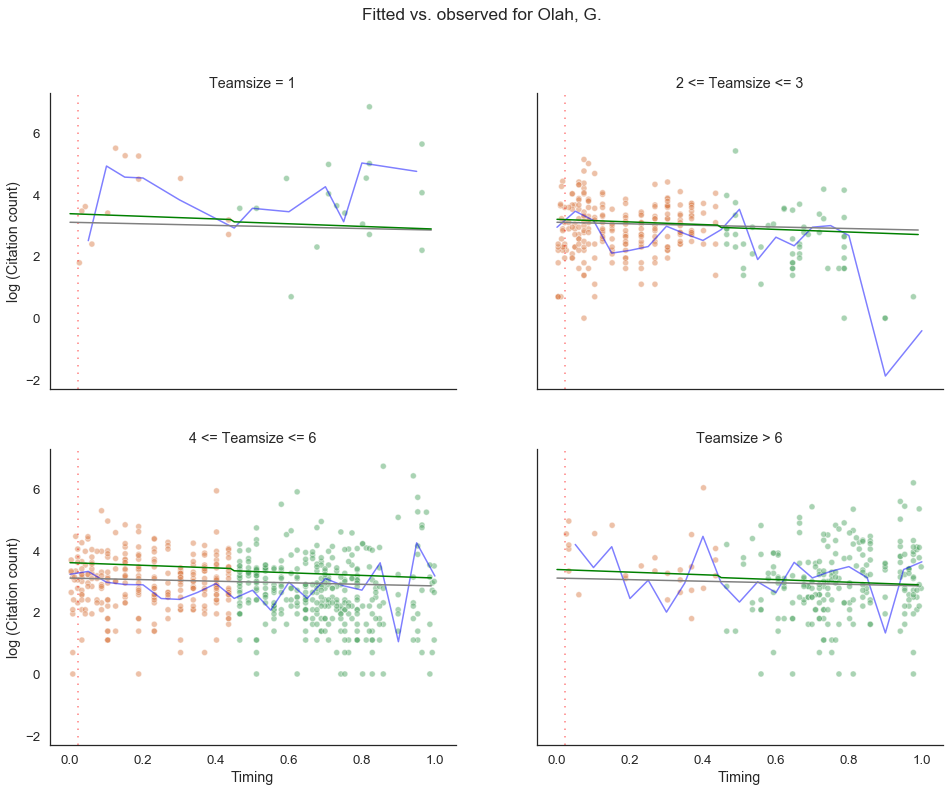

In [53]:
# inspect the observed vs. fitted
df_sel = df[df['laureate'] == 'olah, g']
# for plotting means every 0.05 timing
df_sel['timing_round'] = np.around(df_sel['timing']/5,2)*5
obs_means = df_sel.groupby(
    ['teamsize_cat', 'timing_round']
)['citecount'].mean().dropna().reset_index()
obs_means = obs_means[obs_means['citecount'] > 0]
obs_means['log_citecount'] = np.log(obs_means['citecount'])
# construct covariate matrix for fitted values
x = np.arange(0,1,0.01)
# get timing as median of two papers around 1980
period_timing = np.median(
    [df_sel[df_sel['pub_year'] <= 1980]['timing'].max(),
    df_sel[df_sel['pub_year'] > 1980]['timing'].min()]
)
prize_timing = chem_df[
    (chem_df['Laureate name'] == 'olah, g')
    & (chem_df['Is prize-winning paper'] == 'YES')
]['timing'].values[0]
X = pd.DataFrame({
    'intercept': np.ones(len(x)),
    'timing': x,
    'period2': [1 if t <= period_timing else 0 for t in x],
    'period3': [1 if t > period_timing else 0 for t in x]
})
# plot
fig, ax = plt.subplots(
    2, 2, 
    sharex='all', sharey='all', 
    figsize=(16,12));
# mark prize winning year
ax[0,0].axvline(x=prize_timing, color='red', dashes=[1,4], alpha=0.5)
ax[0,1].axvline(x=prize_timing, color='red', dashes=[1,4], alpha=0.5)
ax[1,0].axvline(x=prize_timing, color='red', dashes=[1,4], alpha=0.5)
ax[1,1].axvline(x=prize_timing, color='red', dashes=[1,4], alpha=0.5)
# plot observed
sns.scatterplot(
    x='timing',
    y='log_citecount',
    hue='pub_period', legend=False,
    data=df_sel[df_sel['teamsize_cat'] == '1'],
    alpha=0.5,
    ax=ax[0,0]
).set_title(
    'Teamsize = 1'
)
sns.scatterplot(
    x='timing',
    y='log_citecount',
    hue='pub_period', legend=False,
    data=df_sel[df_sel['teamsize_cat'] == '2'],
    alpha=0.5,
    ax=ax[0,1]
).set_title(
    '2 <= Teamsize <= 3'
)
sns.scatterplot(
    x='timing',
    y='log_citecount',
    hue='pub_period', legend=False,
    data=df_sel[df_sel['teamsize_cat'] == '3-4'],
    alpha=0.5,
    ax=ax[1,0]
).set_title(
    '4 <= Teamsize <= 6'
)
sns.scatterplot(
    x='timing',
    y='log_citecount',
    hue='pub_period', legend=False,
    data=df_sel[df_sel['teamsize_cat'] == '>4'],
    alpha=0.5,
    ax=ax[1,1]
).set_title(
    'Teamsize > 6'
)
# plot observed means
sns.lineplot(
    x='timing_round',
    y='log_citecount',
    data=obs_means[obs_means['teamsize_cat']=='1'],
    color='blue',
    alpha=0.5,
    ax=ax[0,0]
)
sns.lineplot(
    x='timing_round',
    y='log_citecount',
    data=obs_means[obs_means['teamsize_cat']=='2'],
    color='blue',
    alpha=0.5,
    ax=ax[0,1]
)
sns.lineplot(
    x='timing_round',
    y='log_citecount',
    data=obs_means[obs_means['teamsize_cat']=='3-4'],
    color='blue',
    alpha=0.5,
    ax=ax[1,0]
)
sns.lineplot(
    x='timing_round',
    y='log_citecount',
    data=obs_means[obs_means['teamsize_cat']=='>4'],
    color='blue',
    alpha=0.5,
    ax=ax[1,1]
)
# plot fitted reference
sns.lineplot(
    x,
    np.array(X.iloc[:, :2])@est_most_ref,
    color='gray',
    ax=ax[0,0]
)
sns.lineplot(
    x,
    np.array(X.iloc[:, :2])@est_most_ref,
    color='gray',
    ax=ax[0,1]
)
sns.lineplot(
    x,
    np.array(X.iloc[:, :2])@est_most_ref,
    color='gray',
    ax=ax[1,0]
)
sns.lineplot(
    x,
    np.array(X.iloc[:, :2])@est_most_ref,
    color='gray',
    ax=ax[1,1]
)
# plot fitted full
Y = np.concatenate(
    (np.array(X), np.zeros([len(x), 3])),
    axis=1)
sns.lineplot(
    x,
    Y@est_most_full,
    color='green',
    ax=ax[0,0]
)
Y[:, 4] = 1
sns.lineplot(
    x,
    Y@est_most_full,
    color='green',
    ax=ax[0,1]
)
Y[:, 4] = 0
Y[:, 5] = 1
sns.lineplot(
    x,
    Y@est_most_full,
    color='green',
    ax=ax[1,0]
)
Y[:, 5] = 0
Y[:, 6] = 1
sns.lineplot(
    x,
    Y@est_most_full,
    color='green',
    ax=ax[1,1]
)
fig.suptitle('Fitted vs. observed for Olah, G.')
ax[0,0].set_xlabel('Timing')
ax[0,1].set_xlabel('Timing')
ax[1,0].set_xlabel('Timing')
ax[1,1].set_xlabel('Timing')
ax[0,0].set_ylabel('log (Citation count)')
ax[0,1].set_ylabel('log (Citation count)')
ax[1,0].set_ylabel('log (Citation count)')
ax[1,1].set_ylabel('log (Citation count)')
sns.despine();

+   The dots represent the observed citation counts.
+   Blue lines represent the observed mean citation counts per `0.05` timing.
+   Green lines represent the fitted estimates from the full model.
+   Gray lines represent the fitted estimates from the reference model.

It's difficult to tell from the plots which fit better. Also, the estimates for `timing` effect are similiar between the two models. I will select the full model which provides a more "conservative" picutre with multiple covariates considered. Metrics such as AIC/BIC also suggest the full model is a better fit. 

## Interpretation

In [54]:
fe_full

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),4.054242,0.073746,54.975731,0.000000e+00
timing,-0.425948,0.002839,-150.055270,0.000000e+00
factor(pub_period).L,0.142455,0.003896,36.561494,1.171029e-292
factor(pub_period).Q,0.071396,0.002042,34.958042,9.773650e-268
factor(teamsize_cat).L,-0.181480,0.001558,-116.472741,0.000000e+00
factor(teamsize_cat).Q,0.221117,0.001390,159.037886,0.000000e+00
factor(teamsize_cat).C,0.000311,0.001218,0.255430,7.983907e-01


In [55]:
full_model_est = fe_full.iloc[1:7,:2].copy()
# change the scale to represeent 50% of one's career progress
full_model_est.iloc[0,:] = full_model_est.iloc[0,:]*0.5 
full_model_est

,Estimate,Std. Error
timing,-0.212974,0.001419
factor(pub_period).L,0.142455,0.003896
factor(pub_period).Q,0.071396,0.002042
factor(teamsize_cat).L,-0.181480,0.001558
factor(teamsize_cat).Q,0.221117,0.001390
factor(teamsize_cat).C,0.000311,0.001218


In [56]:
full_model_est['Estimate']

timing                   -0.212974
factor(pub_period).L      0.142455
factor(pub_period).Q      0.071396
factor(teamsize_cat).L   -0.181480
factor(teamsize_cat).Q    0.221117
factor(teamsize_cat).C    0.000311
Name: Estimate, dtype: float64

In [58]:
ests = pd.DataFrame({
    'est': full_model_est['Estimate'],
    'lwr': full_model_est@np.array([1, -1.96]),
    'upr': full_model_est@np.array([1, 1.96])
})
ests

,est,lwr,upr
timing,-0.212974,-0.215756,-0.210192
factor(pub_period).L,0.142455,0.134818,0.150091
factor(pub_period).Q,0.071396,0.067393,0.075399
factor(teamsize_cat).L,-0.181480,-0.184534,-0.178426
factor(teamsize_cat).Q,0.221117,0.218392,0.223842
factor(teamsize_cat).C,0.000311,-0.002076,0.002698


In [59]:
# present in natural scale
np.round(np.exp(ests),3)

,est,lwr,upr
timing,0.808,0.806,0.810
factor(pub_period).L,1.153,1.144,1.162
factor(pub_period).Q,1.074,1.070,1.078
factor(teamsize_cat).L,0.834,0.831,0.837
factor(teamsize_cat).Q,1.247,1.244,1.251
factor(teamsize_cat).C,1.000,0.998,1.003


From the table above, we see that papers written by Nobel laureates cited 20% less on average after 50% of their whole career. That is, a paper written in a laureate's third quarter of the career gets 20% less citations compared to a paper written in the first quarter of the career.